## 데이터프레임으로 데이터 합치기 - group by

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('store_data.csv')

data['TOTAL'] = data['QUANTITY'] * data['UNIT PRICE']

data

DATE CUSTOMER          ITEM  QUANTITY  UNIT PRICE   TOTAL
0   2017-01-02    Alice          Milk       1.0         1.0     1.0
1   2017-01-02    Alice        Orange       5.0         2.0    10.0
2   2017-01-03      Bob        Banana       3.0         3.0     9.0
3   2017-01-03      Bob        Orange       3.0         2.0     6.0
4   2017-01-03    Alice         Apple       3.0         5.0    15.0
5   2017-01-03    Alice        Banana       1.0         3.0     3.0
6   2017-01-04    Alice          Milk       1.0         1.0     1.0
7   2017-01-04    Alice        Banana       1.0         3.0     3.0
8   2017-01-04  Charlie  Gold nuggets       2.0      1000.0  2000.0
9   2017-01-04      Bob        Banana       1.0         3.0     3.0
10  2017-01-05    Alice        Banana       1.0         3.0     3.0
11  2017-01-05  Charlie        Banana       2.0         3.0     6.0
12  2017-01-05      Bob        Orange       2.0         2.0     4.0
13  2017-01-06      Bob        Orange       NaN         2.0     NaN
14  2017-01-06    Alice        Orange       2.0         NaN     NaN

In [3]:
data['CUSTOMER'].value_counts()

Alice      8
Bob        5
Charlie    2
Name: CUSTOMER, dtype: int64

#### Group By (Aggregation)

In [4]:
data.groupby('CUSTOMER')

In [5]:
data.groupby('CUSTOMER').sum()

QUANTITY  UNIT PRICE   TOTAL
CUSTOMER                              
Alice         15.0        18.0    36.0
Bob            9.0        12.0    22.0
Charlie        4.0      1003.0  2006.0

In [6]:
data.groupby('CUSTOMER')[['UNIT PRICE', 'TOTAL']].sum()

UNIT PRICE   TOTAL
CUSTOMER                    
Alice           18.0    36.0
Bob             12.0    22.0
Charlie       1003.0  2006.0

In [7]:
data['TOTAL'].groupby(data['CUSTOMER']).sum()

CUSTOMER
Alice        36.0
Bob          22.0
Charlie    2006.0
Name: TOTAL, dtype: float64

In [8]:
data.groupby('CUSTOMER')['TOTAL'].sum()

CUSTOMER
Alice        36.0
Bob          22.0
Charlie    2006.0
Name: TOTAL, dtype: float64

In [11]:
df = pd.read_csv('train.csv', index_col='PassengerId')

In [12]:
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [13]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [14]:
df.groupby('Sex')[['Survived', 'Fare']].mean()

Survived       Fare
Sex                        
female  0.742038  44.479818
male    0.188908  25.523893

In [22]:
# 객실등급 별 평균 요금을 구해보세요.
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [25]:
df.groupby(['Sex', 'Pclass'])[['Survived']].mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

#### 예제

가장 많이 팔리는 상품 (highest quantity and total revenue)

In [15]:
data.groupby(data['ITEM'])[['QUANTITY', 'TOTAL']].sum().sort_values(by='QUANTITY', ascending=False)

QUANTITY   TOTAL
ITEM                          
Orange            12.0    20.0
Banana             9.0    27.0
Apple              3.0    15.0
Gold nuggets       2.0  2000.0
Milk               2.0     2.0

#### 예제

고객정보 (Returning customers)

In [16]:
data['DATE'].groupby(data['CUSTOMER']).count()  # wrong count

CUSTOMER
Alice      8
Bob        5
Charlie    2
Name: DATE, dtype: int64

In [17]:
data.head()

DATE CUSTOMER    ITEM  QUANTITY  UNIT PRICE  TOTAL
0  2017-01-02    Alice    Milk       1.0         1.0    1.0
1  2017-01-02    Alice  Orange       5.0         2.0   10.0
2  2017-01-03      Bob  Banana       3.0         3.0    9.0
3  2017-01-03      Bob  Orange       3.0         2.0    6.0
4  2017-01-03    Alice   Apple       3.0         5.0   15.0

In [18]:
data['DATE'].groupby([data['CUSTOMER'], data['DATE']]).count()

CUSTOMER  DATE      
Alice     2017-01-02    2
          2017-01-03    2
          2017-01-04    2
          2017-01-05    1
          2017-01-06    1
Bob       2017-01-03    2
          2017-01-04    1
          2017-01-05    1
          2017-01-06    1
Charlie   2017-01-04    1
          2017-01-05    1
Name: DATE, dtype: int64

In [19]:
data['DATE'].groupby(data['CUSTOMER']).unique()

CUSTOMER
Alice      [2017-01-02, 2017-01-03, 2017-01-04, 2017-01-0...
Bob         [2017-01-03, 2017-01-04, 2017-01-05, 2017-01-06]
Charlie                             [2017-01-04, 2017-01-05]
Name: DATE, dtype: object

In [20]:
data['DATE'].groupby(data['CUSTOMER']).unique().apply(len)

CUSTOMER
Alice      5
Bob        4
Charlie    2
Name: DATE, dtype: int64

In [26]:
%matplotlib inline

In [27]:
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

<AxesSubplot:xlabel='PassengerId'>

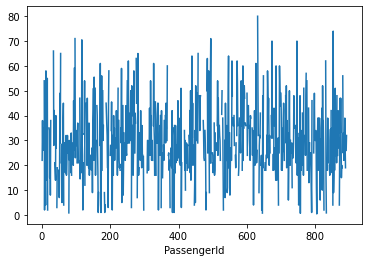

In [28]:
df['Age'].plot()

<AxesSubplot:>

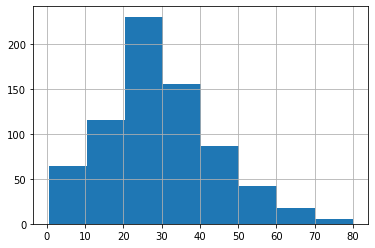

In [30]:
df['Age'].hist(bins=8)